In [ ]:
# !pip install -U pip
# !pip install -U matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/seoul_air.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Date,Gu,PM10,PM2.5,O3,NO2,CO,SO2
0,2023-01-01,중랑구,52.0,39.0,0.0210,0.0300,0.70,0.0030
1,2023-01-01,중구,54.0,46.0,0.0260,0.0230,0.60,0.0040
2,2023-01-01,종로구,53.0,42.0,0.0250,0.0220,0.70,0.0040
3,2023-01-01,은평구,55.0,37.0,0.0230,0.0210,0.80,0.0040
4,2023-01-01,용산구,50.0,37.0,0.0240,0.0190,0.60,0.0040
...,...,...,...,...,...,...,...,...
4753,2023-07-02,강서구,19.0,12.0,0.0329,0.0121,0.38,0.0027
4754,2023-07-02,강북구,24.0,15.0,0.0369,0.0051,0.34,0.0021
4755,2023-07-02,강동구,22.0,15.0,0.0344,0.0105,0.36,0.0024
4756,2023-07-02,강남구,21.0,15.0,0.0431,0.0132,0.33,0.0031


In [15]:
# df.info()
# 'Gu' 컬럼에서 '강남구'와 일치하는 데이터만 필터링하여 새로운 데이터프레임 생성
gangnam = df[df['Gu'] == '강남구'].reset_index(drop=True)
# gangnam

In [21]:
# 강남구 PM2.5 미세먼지 2023-06-10 ~ 2023-07-02 시각화
gangnam

,Date,Gu,PM10,PM2.5,O3,NO2,CO,SO2
0,2023-01-01,강남구,52.0,36.0,0.0240,0.0240,0.60,0.0040
1,2023-01-02,강남구,24.0,11.0,0.0212,0.0206,0.43,0.0034
2,2023-01-03,강남구,29.0,15.0,0.0162,0.0303,0.51,0.0034
3,2023-01-04,강남구,35.0,22.0,0.0111,0.0412,0.61,0.0036
4,2023-01-05,강남구,47.0,32.0,0.0056,0.0523,0.80,0.0038
...,...,...,...,...,...,...,...,...
178,2023-06-28,강남구,30.0,21.0,0.0507,0.0129,0.35,0.0030
179,2023-06-29,강남구,33.0,23.0,0.0371,0.0140,0.34,0.0030
180,2023-06-30,강남구,33.0,25.0,0.0478,0.0229,0.44,0.0030
181,2023-07-01,강남구,29.0,21.0,0.0534,0.0184,0.39,0.0032


KeyError: ignored

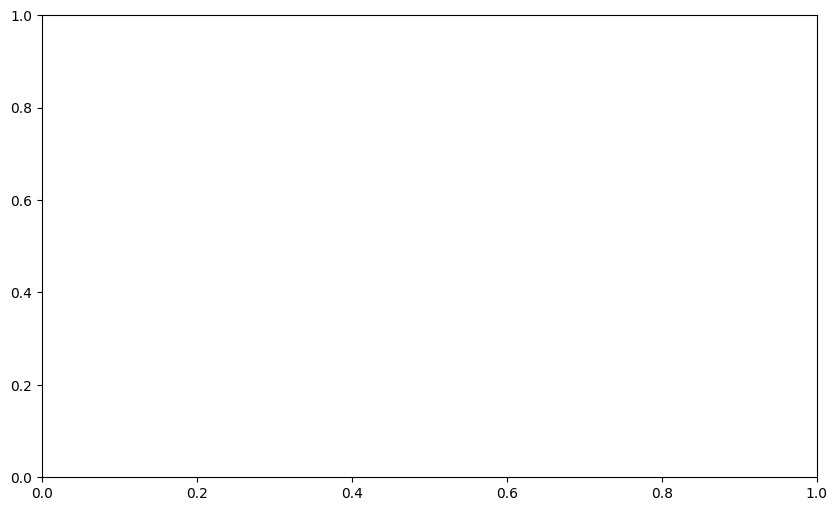

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 측정날짜를 datetime 형식으로 변환
gangnam['Date'] = pd.to_datetime(gangnam['Date'])

# 필터링을 위한 날짜 범위 설정
start_date = pd.to_datetime('2023-06-10')
end_date = pd.to_datetime('2023-07-02')

# 필터링된 데이터 추출
filtered_df = gangnam[(gangnam['Date'] >= start_date) & (gangnam['Date'] <= end_date)]

# 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))

# misemunji 칼럼 생성하든어쩌든 하기
ax.plot(filtered_df['Date'], filtered_df['Misemunji'])
ax.set_xlabel('Date')
ax.set_ylabel('Misemunji')
ax.set_title('Gangnam-gu 일별 미세먼지 데이터')

# x축 눈금 설정
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
# plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
# 강남구 PM10 미세먼지 2023-06-10 ~ 2023-07-02 시각화

In [ ]:
# 강남구 일별 미세먼지 <-> 일별 강수량 상관계수 비교


- [ ]  미세먼지 데이터: 강남구 2023-06-10 ~ 2023-07-02 시각화
- [ ]  미세먼지 - 강수량: 올해 강남구 월 별로 시각화
- [ ] 미세먼지 - 강수량 상관계수 계산

In [ ]:
# 한글, - 표기문제
# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
# ## 폰트 깨짐 문제 해결##
# # 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 보이게 하기

Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
pivot_df = pd.pivot_table(data=df, values='PM10', index='Date', columns='Gu', aggfunc='sum')
pivot_df = pivot_df.fillna(0)
pivot_df.isnull().sum()

Gu
강남구     0
강동구     0
강북구     0
강서구     0
관악구     0
광진구     0
구로구     0
금천구     0
노원구     0
도봉구     0
동대문구    0
동작구     0
마포구     0
서대문구    0
서초구     0
성동구     0
성북구     0
송파구     0
양천구     0
영등포구    0
용산구     0
은평구     0
종로구     0
중구      0
중랑구     0
평균      0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seabo

<Axes: xlabel='Gu', ylabel='Date'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*a

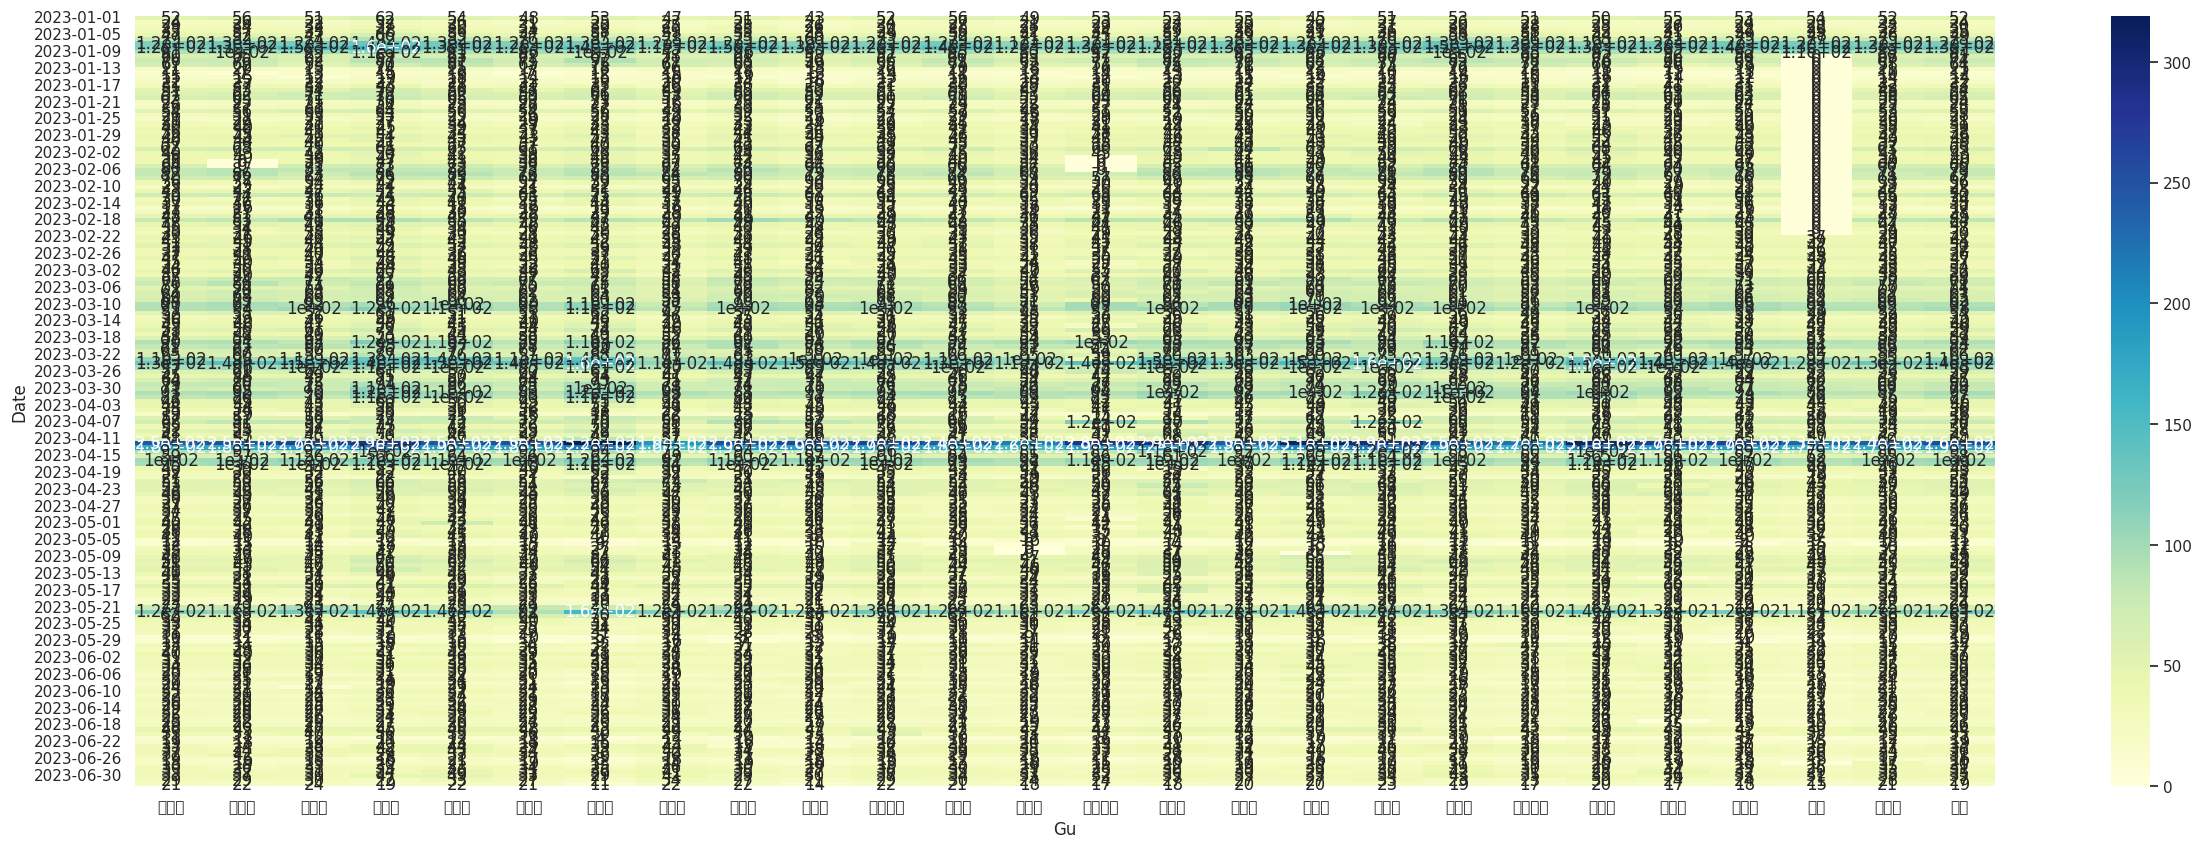

In [ ]:
import seaborn as sns

# 그래프 크기 조절
sns.set(rc={'figure.figsize': (30, 10)})

# 시각화
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')

<ipython-input-18-a8166fb44662>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Date'] = pd.to_datetime(df_selected['Date'])


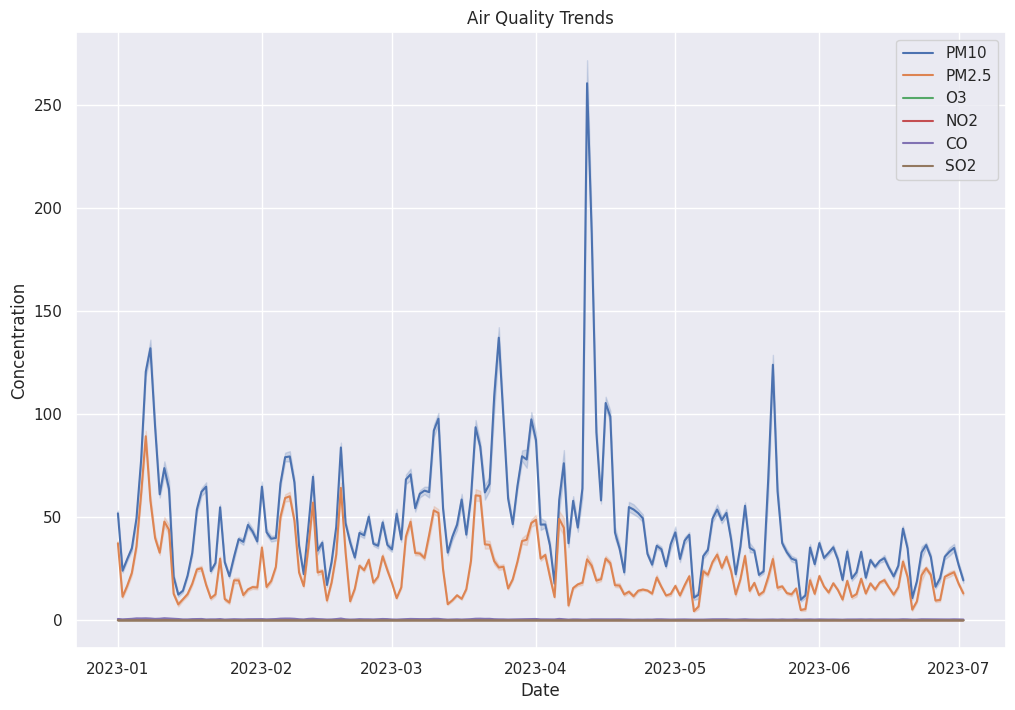

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임에서 필요한 열만 선택
df_selected = df[['Date', 'PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2']]

# 날짜 형식 변경 (옵션)
df_selected['Date'] = pd.to_datetime(df_selected['Date'])

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# PM10, PM2.5, O3, NO2, CO, SO2 열의 추세 그래프 그리기
sns.lineplot(data=df_selected, x='Date', y='PM10', label='PM10')
sns.lineplot(data=df_selected, x='Date', y='PM2.5', label='PM2.5')
sns.lineplot(data=df_selected, x='Date', y='O3', label='O3')
sns.lineplot(data=df_selected, x='Date', y='NO2', label='NO2')
sns.lineplot(data=df_selected, x='Date', y='CO', label='CO')
sns.lineplot(data=df_selected, x='Date', y='SO2', label='SO2')

# 그래프 타이틀과 축 제목 설정
plt.title('Air Quality Trends')
plt.xlabel('Date')
plt.ylabel('Concentration')

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()


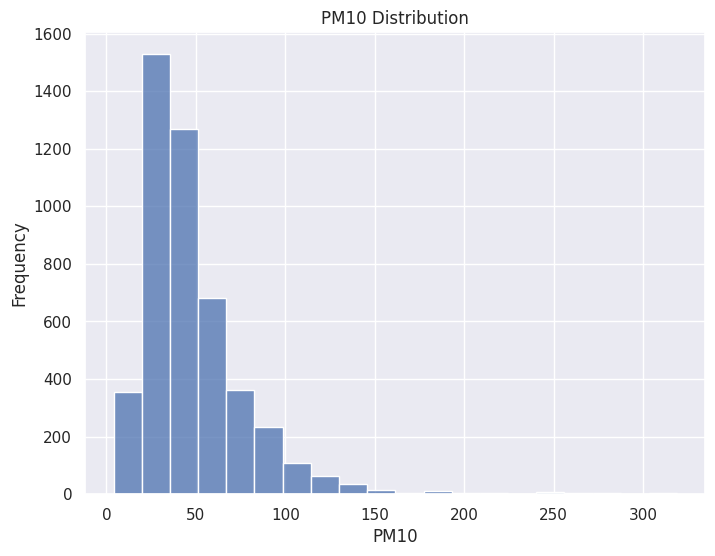

In [ ]:
# PM10 열의 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='PM10', bins=20)
plt.title('PM10 Distribution')
plt.xlabel('PM10')
plt.ylabel('Frequency')
plt.show()

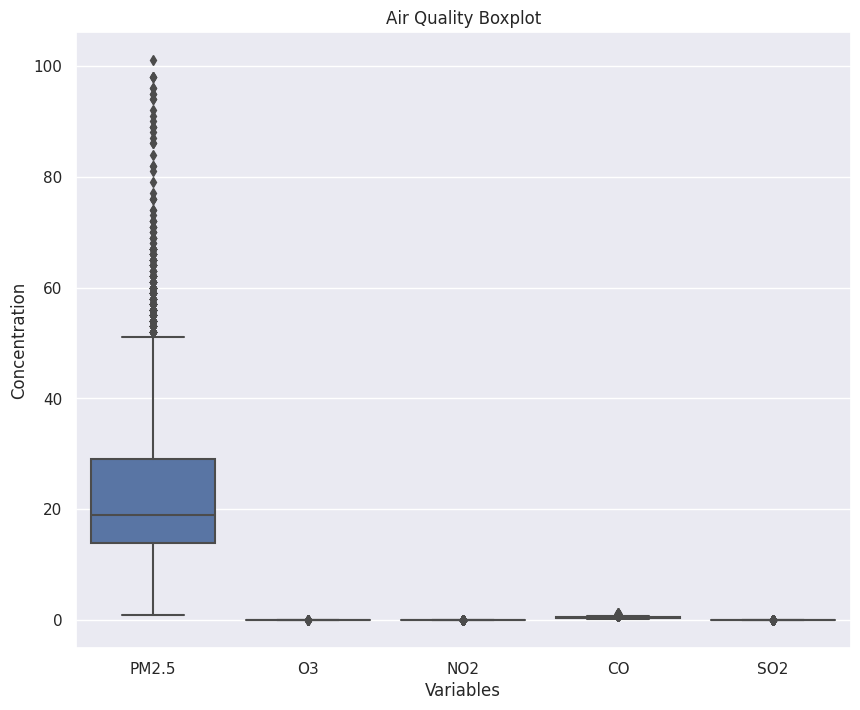

In [ ]:
# PM2.5, O3, NO2, CO, SO2 열의 상자그림
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['PM2.5', 'O3', 'NO2', 'CO', 'SO2']])
plt.title('Air Quality Boxplot')
plt.xlabel('Variables')
plt.ylabel('Concentration')
plt.show()


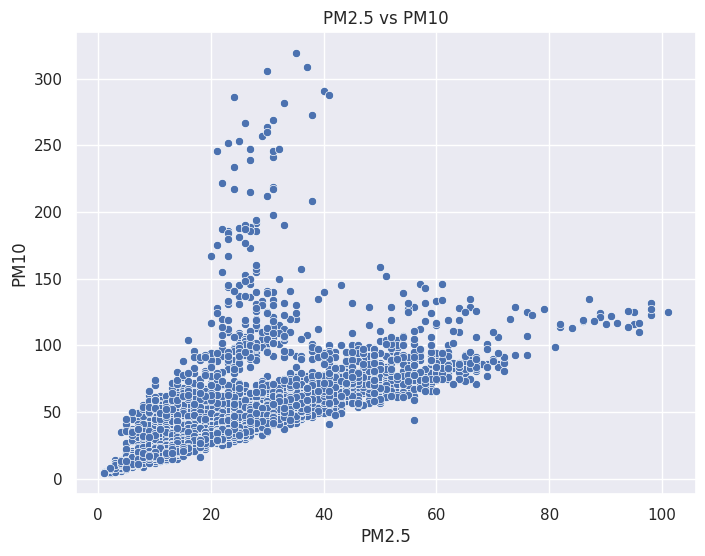

In [ ]:
# PM2.5과 PM10의 산점도
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PM2.5', y='PM10')
plt.title('PM2.5 vs PM10')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.show()


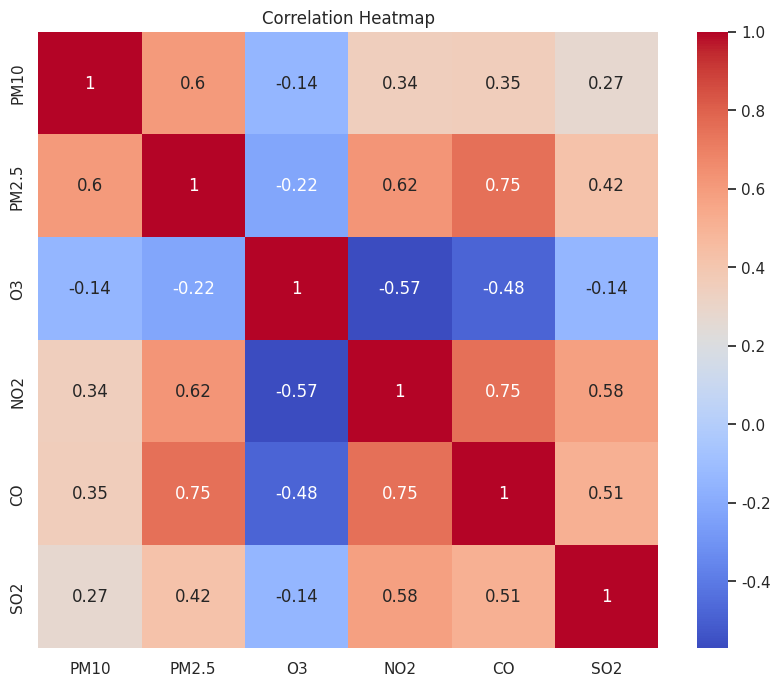

In [ ]:
# 변수 간 상관관계 히트맵
plt.figure(figsize=(10, 8))
correlation = df[['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

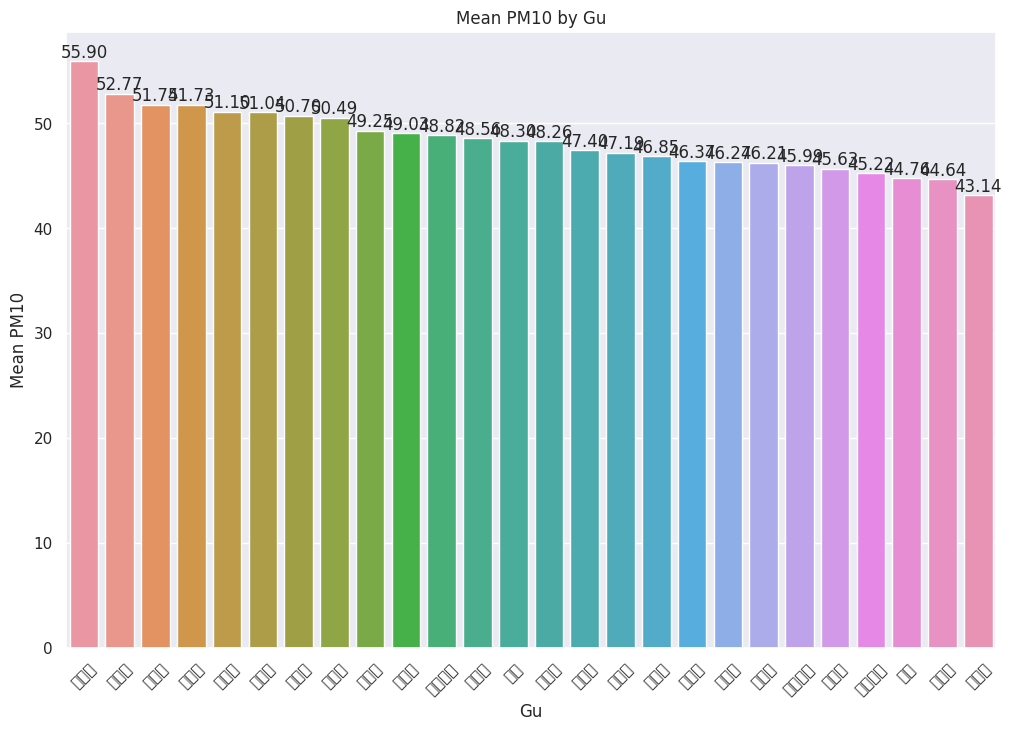

In [ ]:
# 지역(Gu)별 PM10 평균 막대 그래프
plt.figure(figsize=(12, 8))
mean_pm10_by_gu = df.groupby('Gu')['PM10'].mean().sort_values(ascending=False)
bar_plot = sns.barplot(x=mean_pm10_by_gu.index, y=mean_pm10_by_gu.values)
plt.title('Mean PM10 by Gu')
plt.xlabel('Gu')
plt.ylabel('Mean PM10')
plt.xticks(rotation=45)

# 각 막대 위에 값 표시
for i, v in enumerate(mean_pm10_by_gu.values):
    bar_plot.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

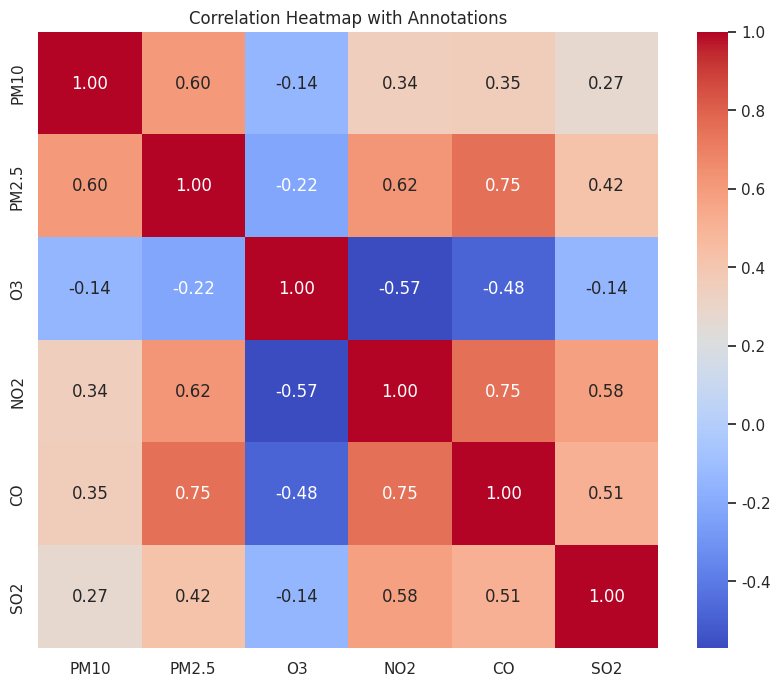

In [ ]:
# 변수 간 상관관계 히트맵 with annotations
plt.figure(figsize=(10, 8))
correlation = df[['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Annotations')
plt.show()
